In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Setting path
path = '/content/gdrive/MyDrive/2022/Materi Missing Values/data/'

# Cek directory
os.listdir(path)

['Time-Series.csv', 'Mall_Customers.csv']

In [9]:
df = pd.read_csv(path + 'Time-Series.csv', header=None)
# name the columns
df.columns=['Date','Customers']
# represent date column in date fromat in the order, Year, month and the day
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m')
# set the Date column be the index of our dataset
df= df.set_index('Date')
# now check the data shape
df.shape

(144, 1)

In [16]:
df.head(50)

,Customers,FillMean
Date,,
1949-01-01,114.0,114.000000
1949-02-01,120.0,120.000000
1949-03-01,134.0,134.000000
1949-04-01,67.0,67.000000
1949-05-01,123.0,123.000000
1949-06-01,137.0,137.000000
1949-07-01,150.0,150.000000
1949-08-01,50.0,50.000000
1949-09-01,138.0,138.000000


In [10]:
df.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


In [12]:
# creating series True or False for NaN data and present data respectively. 
nul_data = pd.isnull(df['Customers']) 
    
# print only the data, Customers = NaN 
df[nul_data]

,Customers
Date,
1951-06-01,NaN
1951-07-01,NaN
1954-06-01,NaN
1960-03-01,NaN


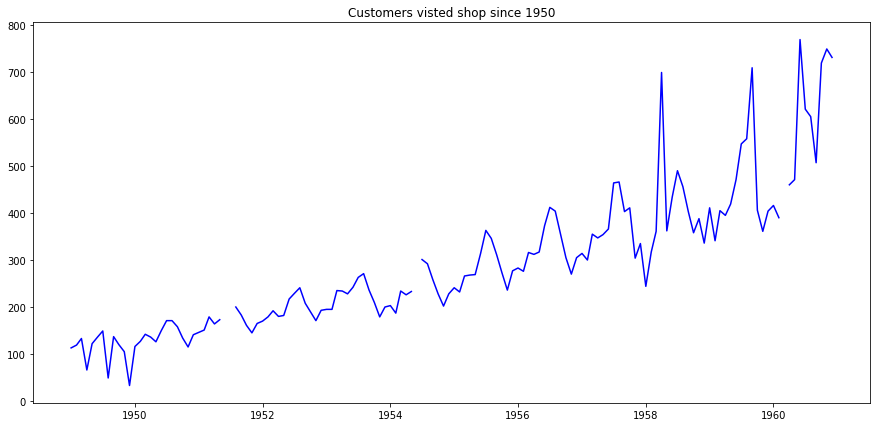

In [13]:
 # set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(df, color='blue')
# adds title to our time series plot
plt.title('Customers visted shop since 1950') 
# print the plot
plt.show()

1. Mean imputation :
This technique imputes the missing values with the average value of all the data already given in the time series. 

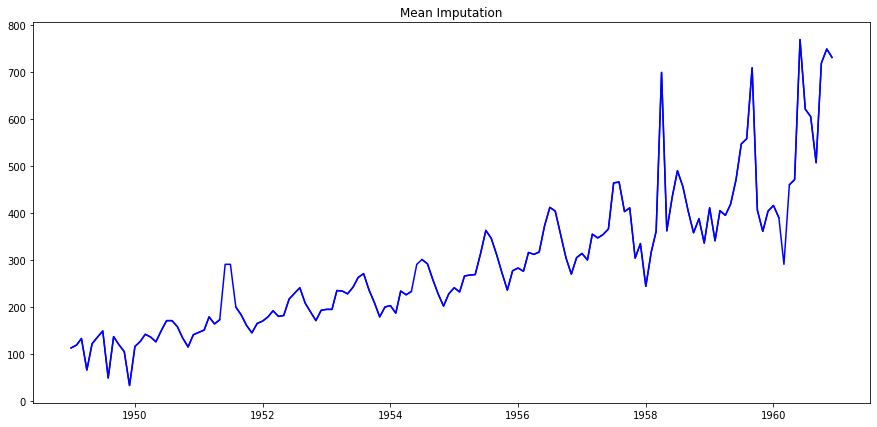

In [15]:
# declare the size of the  plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the mean of the present observations
df = df.assign(FillMean=df.Customers.fillna(df.Customers.mean()))
# pass the data and declared the colour of your curve, i.e., blue
plt.plot(df, color='blue')
# add tittle to the plot
plt.title('Mean Imputation')
 # print the plot
plt.show()

2. Median imputation : In this technique, we replace the missing values in the data with the median value of the data

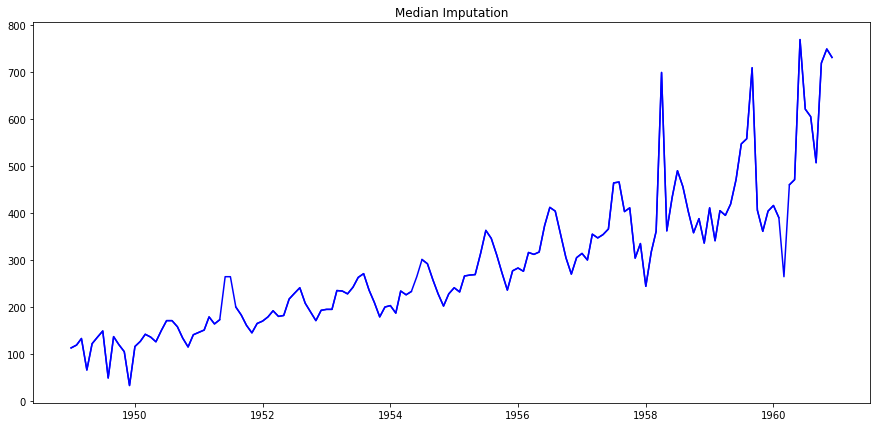

In [17]:
# declare the size of the  plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the of the present observations
df = df.assign(FillMean=df.Customers.fillna(df.Customers.median()))
# pass the data and declared the colouyr opf our curve as blue
plt.plot(df, color='blue')
# add tittle to the plot
plt.title('Median Imputation')
 # print the plot
plt.show()

Upon plotting the data in both of the above two methods, it is clear that all missing values were successfully imputed. However, we can notice a problem with using these techniques. These techniques do not work appropriately if the time series has seasonality and trend components. This is because the seasonality and trend components are not considered while imputing the missing data. Therefore, they can only work better if the observed time series has no seasonality or trend component.

If the time series has these components, the following methods work better to impute its missing values:

3. Last Observation Carried Forward (LOCF) : According to this technique, the missing value is imputed using the values before it in the time series. 

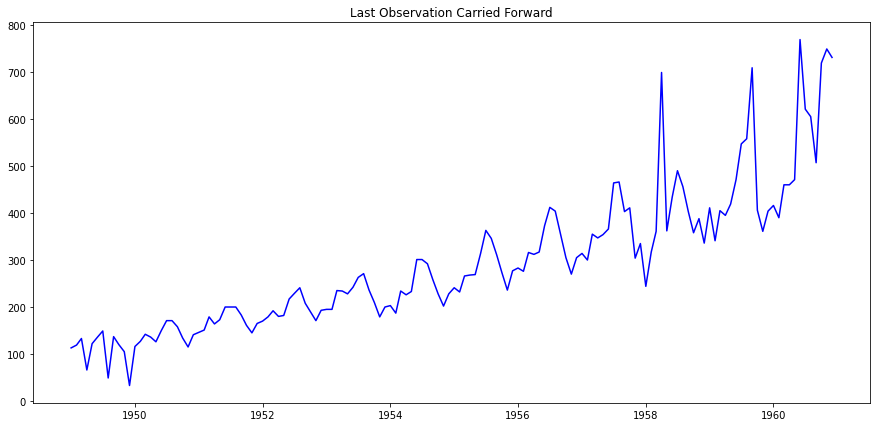

In [19]:
# figure size
plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
df['Customers_locf']= df['Customers'].fillna(method ='bfill')
# plot our time series with imputed values
plt.plot(df['Customers_locf'], color='blue')
#Plot tittle
plt.title('Last Observation Carried Forward')
# show the plot
plt.show()

4. Next Observation Carried Backward (NOCB) : According to this technique, the missing values are imputed using an immediate value ahead of them

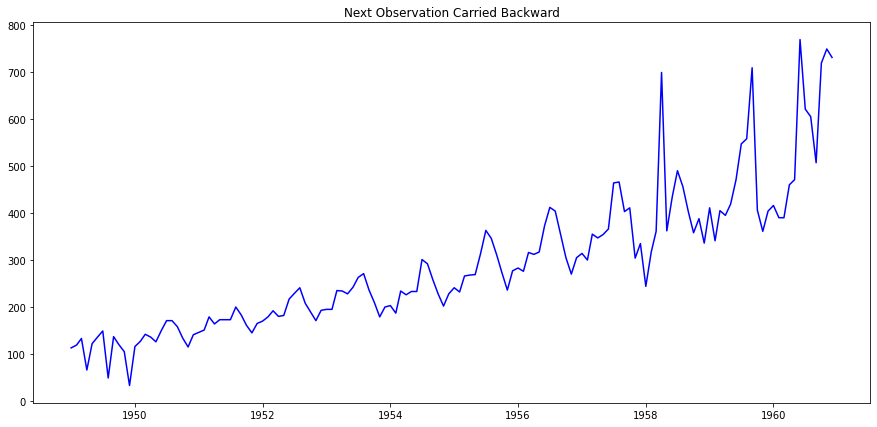

In [20]:
# ffigure size
plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
df['Customers_nocb']= df['Customers'].fillna(method ='ffill')
# plot our time series with imputed values
plt.plot(df['Customers_nocb'], color='blue')
#Plot tittle
plt.title('Next Observation Carried Backward')
# show the plot
plt.show()

5. Linear interpolation : This technique originates from Numerical Analysis, which estimates unknown values by assuming linear relation within a range of data points, unlike linear extrapolation, which estimates data outside the range of the provided data points. To estimate the missing values using linear interpolation, we look at the past and the future data from the missing value.
Therefore, the found missing values are expected to fall within two finite points whose values are known, hence a known range of values in which our estimated value can lie.

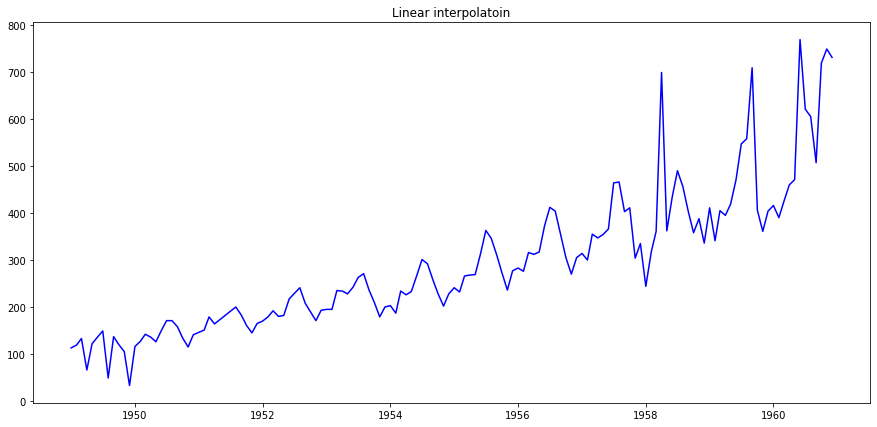

In [22]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,7)
# on our data, impute the missing values using rolling window method
df['Customers_L']= df['Customers'].interpolate(method='linear')
# plot the complete dataset
plt.plot(df['Customers_L'], color='blue')
# add the tittle of our plot as Linear interpolation
plt.title('Linear interpolatoin')
# print the plot
plt.show()

6. Spline interpolation : Using a mathematical function, the method estimates values that minimize overall curvature, thus obtaining a smooth surface passing through the input points.

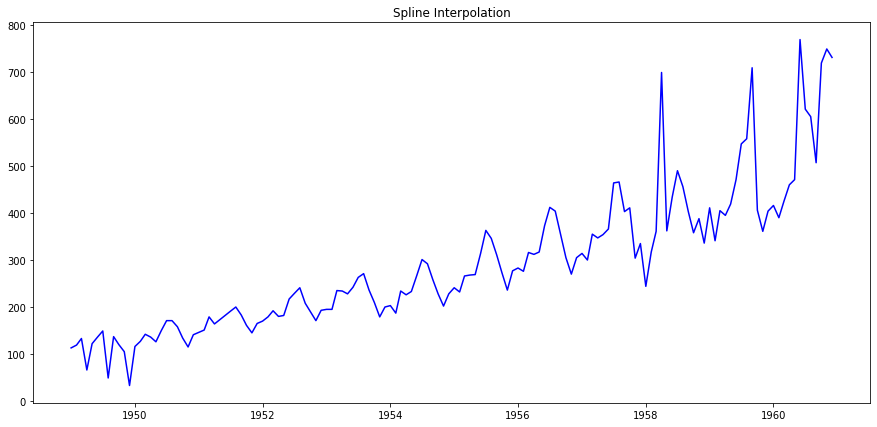

In [23]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,7)
# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
df['Customers_Spline']= df['Customers'].interpolate(option='spline')
# plot the complete dataset
plt.plot(df['Customers_Spline'], color='blue')
# add the tittle of our plot as Linear interpolation
plt.title('Spline Interpolation')
# print the plot
plt.show()

https://www.section.io/engineering-education/missing-values-in-time-series/
